# Importing the necessary libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file into memory

In [4]:
df = pd.read_csv('unemployment_rate.csv')
df

,country,indicator,group,Unit,Date,Value
0,Nigeria,Total Unemployed,Male,Persons,2014Q1,2.447463e+06
1,Nigeria,Total Unemployed,Male,Persons,2014Q2,2.335489e+06
2,Nigeria,Total Unemployed,Male,Persons,2014Q3,3.065451e+06
3,Nigeria,Total Unemployed,Male,Persons,2014Q4,2.035196e+06
4,Nigeria,Total Unemployed,Male,Persons,2015Q1,2.411318e+06
5,Nigeria,Total Unemployed,Male,Persons,2015Q2,2.642694e+06
6,Nigeria,Total Unemployed,Male,Persons,2015Q3,3.276672e+06
7,Nigeria,Total Unemployed,Male,Persons,2015Q4,3.502366e+06
8,Nigeria,Total Unemployed,Male,Persons,2016Q1,4.134737e+06
9,Nigeria,Total Unemployed,Male,Persons,2016Q2,4.693314e+06


# Selecting the columns needed for the analysis

In [6]:
df = df[['group','Date','Value']]
df.head()

,group,Date,Value
0,Male,2014Q1,2447463.268
1,Male,2014Q2,2335489.134
2,Male,2014Q3,3065450.816
3,Male,2014Q4,2035196.340
4,Male,2015Q1,2411318.178


# Extracting the date and getting rid of unwanted characters(tidy up)

In [8]:
extr = df['Date'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    2014
1    2014
2    2014
3    2014
4    2015
Name: Date, dtype: object

# Assigning the extracted date to the date column

In [10]:
df.loc[:, 'Date'] = extr
df.head(50)

,group,Date,Value
0,Male,2014,2.447463e+06
1,Male,2014,2.335489e+06
2,Male,2014,3.065451e+06
3,Male,2014,2.035196e+06
4,Male,2015,2.411318e+06
5,Male,2015,2.642694e+06
6,Male,2015,3.276672e+06
7,Male,2015,3.502366e+06
8,Male,2016,4.134737e+06
9,Male,2016,4.693314e+06


# Renaming columns

In [11]:
df = df.rename(columns={'group':'Group','Date': 'Year',})
df.head()

,Group,Year,Value
0,Male,2014,2447463.268
1,Male,2014,2335489.134
2,Male,2014,3065450.816
3,Male,2014,2035196.340
4,Male,2015,2411318.178


# Pivot table

In [43]:
df_pivot= df.pivot_table(index ='Year',columns = 'Group', values = 'Value')

In [14]:
df_pivot

Group,BA/BSc/Bed/HND,Female,MSC/MA/MAdm,Male,NCE/OND/NURSING,Post Secondary,Youth (15-34)
Year,,,,,,,
2010,NaN,7.958375e+05,NaN,8.633799e+05,NaN,1.969201e+05,NaN
2011,NaN,8.862705e+05,NaN,1.116845e+06,NaN,1.708363e+05,NaN
2012,NaN,1.958035e+06,NaN,1.692790e+06,NaN,6.119606e+05,NaN
2013,NaN,1.995406e+06,NaN,1.543830e+06,NaN,5.902699e+05,NaN
2014,NaN,1.598207e+06,NaN,1.235453e+06,NaN,4.533598e+05,NaN
2015,NaN,1.914780e+06,NaN,1.479135e+06,NaN,5.340950e+05,NaN
2016,NaN,3.003193e+06,NaN,2.356429e+06,NaN,1.261566e+06,3.890827e+06
2017,810965.241895,4.031132e+06,36243.511047,3.353962e+06,8.630656e+05,1.624198e+06,4.935379e+06
2018,832797.257077,5.115230e+06,43541.839798,4.971893e+06,1.317106e+06,2.198052e+06,6.538089e+06


# Renaming columns

In [15]:
df_pivot = df_pivot.rename(columns={'BA/BSc/Bed/HND':'First degree','MSC/MA/MAdm': 'Second degree','NCE/OND/NURSING':'Diploma'})

In [16]:
df_pivot.head()

Group,First degree,Female,Second degree,Male,Diploma,Post Secondary,Youth (15-34)
Year,,,,,,,
2010,NaN,7.958375e+05,NaN,8.633799e+05,NaN,196920.149818,NaN
2011,NaN,8.862705e+05,NaN,1.116845e+06,NaN,170836.294546,NaN
2012,NaN,1.958035e+06,NaN,1.692790e+06,NaN,611960.619897,NaN
2013,NaN,1.995406e+06,NaN,1.543830e+06,NaN,590269.875435,NaN
2014,NaN,1.598207e+06,NaN,1.235453e+06,NaN,453359.793387,NaN


# Getting rid of missing values by assign zero to it

In [54]:
df1 = df_pivot.fillna(0)
df1

Group,BA/BSc/Bed/HND,Female,MSC/MA/MAdm,Male,NCE/OND/NURSING,Post Secondary,Youth (15-34)
Year,,,,,,,
2010,0.000000,7.958375e+05,0.000000,8.633799e+05,0.000000e+00,1.969201e+05,0.000000e+00
2011,0.000000,8.862705e+05,0.000000,1.116845e+06,0.000000e+00,1.708363e+05,0.000000e+00
2012,0.000000,1.958035e+06,0.000000,1.692790e+06,0.000000e+00,6.119606e+05,0.000000e+00
2013,0.000000,1.995406e+06,0.000000,1.543830e+06,0.000000e+00,5.902699e+05,0.000000e+00
2014,0.000000,1.598207e+06,0.000000,1.235453e+06,0.000000e+00,4.533598e+05,0.000000e+00
2015,0.000000,1.914780e+06,0.000000,1.479135e+06,0.000000e+00,5.340950e+05,0.000000e+00
2016,0.000000,3.003193e+06,0.000000,2.356429e+06,0.000000e+00,1.261566e+06,3.890827e+06
2017,810965.241895,4.031132e+06,36243.511047,3.353962e+06,8.630656e+05,1.624198e+06,4.935379e+06
2018,832797.257077,5.115230e+06,43541.839798,4.971893e+06,1.317106e+06,2.198052e+06,6.538089e+06


In [58]:
df1_grouped = df1.groupby('Year')

In [59]:
df1_grouped.count()

Group,BA/BSc/Bed/HND,Female,MSC/MA/MAdm,Male,NCE/OND/NURSING,Post Secondary,Youth (15-34)
Year,,,,,,,
2010,1,1,1,1,1,1,1
2011,1,1,1,1,1,1,1
2012,1,1,1,1,1,1,1
2013,1,1,1,1,1,1,1
2014,1,1,1,1,1,1,1
2015,1,1,1,1,1,1,1
2016,1,1,1,1,1,1,1
2017,1,1,1,1,1,1,1
2018,1,1,1,1,1,1,1


In [60]:
df1_grouped.groups

{'2010': Index(['2010'], dtype='object', name='Year'),
 '2011': Index(['2011'], dtype='object', name='Year'),
 '2012': Index(['2012'], dtype='object', name='Year'),
 '2013': Index(['2013'], dtype='object', name='Year'),
 '2014': Index(['2014'], dtype='object', name='Year'),
 '2015': Index(['2015'], dtype='object', name='Year'),
 '2016': Index(['2016'], dtype='object', name='Year'),
 '2017': Index(['2017'], dtype='object', name='Year'),
 '2018': Index(['2018'], dtype='object', name='Year')}

In [61]:
df2 = df1_grouped.agg(np.mean)

In [62]:
df2

Group,BA/BSc/Bed/HND,Female,MSC/MA/MAdm,Male,NCE/OND/NURSING,Post Secondary,Youth (15-34)
Year,,,,,,,
2010,0.000000,7.958375e+05,0.000000,8.633799e+05,0.000000e+00,1.969201e+05,0.000000e+00
2011,0.000000,8.862705e+05,0.000000,1.116845e+06,0.000000e+00,1.708363e+05,0.000000e+00
2012,0.000000,1.958035e+06,0.000000,1.692790e+06,0.000000e+00,6.119606e+05,0.000000e+00
2013,0.000000,1.995406e+06,0.000000,1.543830e+06,0.000000e+00,5.902699e+05,0.000000e+00
2014,0.000000,1.598207e+06,0.000000,1.235453e+06,0.000000e+00,4.533598e+05,0.000000e+00
2015,0.000000,1.914780e+06,0.000000,1.479135e+06,0.000000e+00,5.340950e+05,0.000000e+00
2016,0.000000,3.003193e+06,0.000000,2.356429e+06,0.000000e+00,1.261566e+06,3.890827e+06
2017,810965.241895,4.031132e+06,36243.511047,3.353962e+06,8.630656e+05,1.624198e+06,4.935379e+06
2018,832797.257077,5.115230e+06,43541.839798,4.971893e+06,1.317106e+06,2.198052e+06,6.538089e+06


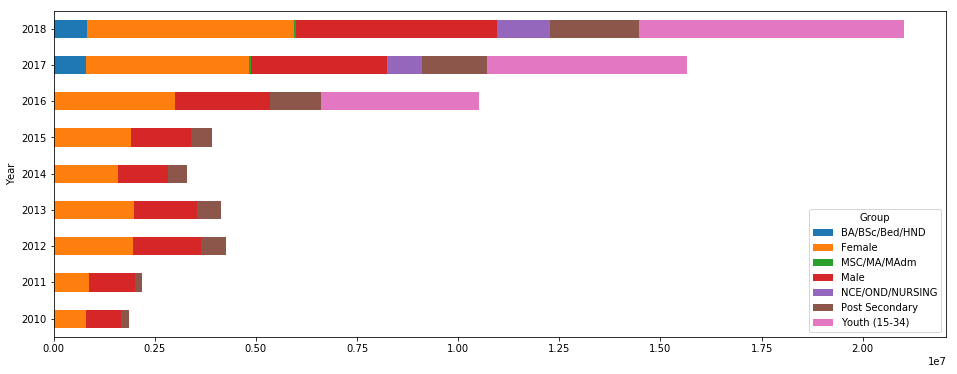

In [67]:
df2.plot(kind='barh', stacked=True, figsize=[16,6])